## Extracting the Principal components step by step
Following steps needs to be implemented for PCA :-
1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the co-variance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature space.
6. Construct a projection matrix **W** from the top k-eigenvectors.
7. Transform the d-dimensional input dataset **X** using the projection matrix **W**

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/wine/wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# Split the data into 80% training and 20% testing
X,y=df.iloc[:,1:].values, df.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((142, 13), (36, 13))

In [19]:
# Skewness in Class distribution
df[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [24]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Thus, we see that the data is not on the same scale and needs to be standardize so as to perform PCA.

### 1. Standardize the Data

In [25]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

### 2. Construct the Covariance matrix
![](./images/cov1.png)
Covariance of 3 features will look like this :- 
![](./images/cov2.png)
A positive covariance between 2 features indicate that the features increase or decrease together, whereas a negative covariance means that the features vary in opposite directions.<br>
The eigenvectors of the covariance matrix represent the Principal Components, whereas the corresponding eigenvalues will define their magnitudes.

$\sigma_{jk}$ = $\frac{1}{n}\sum_{i=1}^n(x_{j}^{(i)}-\mu_j)(x_{k}^{(i)}-\mu_k)$

In [35]:
cov_mat=np.cov(x_train_std.T)
cov_mat.shape

(13, 13)

### 3. Construct the eigenvalues and eigenvectors

#### Understanding eigenvalues and eigenvectors
1. Consider the following two images :-

<img src='./images/eigen2.png' height=24% width=24% align="left"></img>
<img src='./images/eigen3.png' height=20% width=20%></img>

2. The left-side square contains 3 vectors in 2-D plain, and the right-side figure contains the same vectors but after transformation [which can be performed via matrix operations(scaling, rotating and shearing)]
3. Thus eigen-vectors are those vectors(like in our case 'pink' and 'green' vectors) who don't change the span axis and lies on the same span-axis even after transformation.
4. Corresponding eigen-values are the scaler value by which the corresponding eigen-vector stretches or contracts. In this example eigen-value for 'pink' vector can be say 3 and for 'green' it is 1.

In [37]:
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
eigen_vals

array([4.82894083, 2.52920254, 1.40778607, 0.97170248, 0.81772614,
       0.64269609, 0.53904343, 0.09124383, 0.16401706, 0.32677915,
       0.30227988, 0.22672631, 0.24405475])

In [38]:
# Corresponding eigenvectors
eigen_vecs.shape

(13, 13)

Since, we want to reduce dimensionality of our dataset by  compressing it into a new feature space, we only select the subset of eigenvectors that contains most of the information(Variance).

### 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
Need to calculate the **variance explained ratios** Given by :-
$$\frac{\lambda_j}{\sum_{j=1}^d\lambda_j}$$

In [40]:
# Variance Explained Ratios
tot=sum(eigen_vals)
var_exp=[i/tot for i  in sorted(eigen_vals,reverse=True)]
var_exp

[0.3688410929485785,
 0.19318394297415248,
 0.10752862207975974,
 0.07421996186682665,
 0.06245903896463082,
 0.04909000492808271,
 0.04117287328777511,
 0.024959837570992422,
 0.023088549785270994,
 0.018641235175096468,
 0.01731766484361656,
 0.01252784704589009,
 0.006969328529327366]

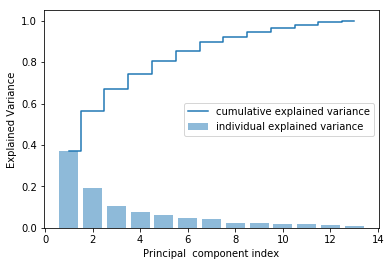

In [43]:
# Calculating the cumulative sum
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal  component index')
plt.legend(loc='best')
plt.show()

Hence, we can see that first principal component alone accounts for 40 percent of the variance.

In [45]:
# let's make a  list of (eigenvalue,eigenvector)
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# let's sort the eigenvalues,eigenvectors tuples from high to low
eigen_pairs.sort(key=lambda k : k[0],reverse=True)

### 5. Construct W matrix

In [52]:
# Let's collect the 2 eigenvectors that captures almost 60% of the variance
# in the dataset.
print(eigen_pairs[0][1].shape)

w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
           eigen_pairs[1][1][:,np.newaxis]))

print('Matrix W : \n',w)

(13,)
Matrix W : 
 [[ 0.12959991 -0.49807323]
 [-0.24464064 -0.23168482]
 [-0.01018912 -0.31496874]
 [-0.24051579  0.02321825]
 [ 0.12649451 -0.25841951]
 [ 0.38944115 -0.1006849 ]
 [ 0.42757808 -0.02097952]
 [-0.30505669 -0.0399057 ]
 [ 0.30775255 -0.06746036]
 [-0.11027186 -0.53087111]
 [ 0.30710508  0.27161729]
 [ 0.37636185  0.16071181]
 [ 0.2811085  -0.36547344]]


### 6. Multiplying X by W to get new feature martix

In [56]:
# Thus 13 features are now replaces by 2 features
x_test_std[0].dot(w)

array([ 2.20685211, -1.02850086])

In [57]:
x_train_pca=x_train_std.dot(w)
x_train_pca.shape

(142, 2)

## Visualising the dataset

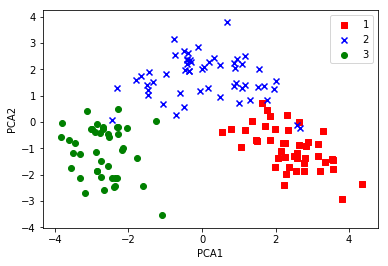

In [58]:
colors=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(x_train_pca[y_train==l,0],
               x_train_pca[y_train==l,1],
               c=c,label=l,marker=m)
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

# Using PCA from scikit-learn

In [65]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])
   
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.6, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

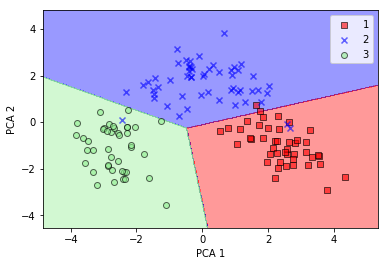

In [67]:
pca=PCA(n_components=2)
lr=LogisticRegression()

x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.transform(x_test_std)

lr.fit(x_train_pca,y_train)

plot_decision_regions(x_train_pca,y_train,classifier=lr)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.show()

Thus, we see that the datapoints are almost the same as in our PCA implementation and LR does a pretty well job on seperating the classes.

In [68]:
# To see the explained_variance_ratio
pca.explained_variance_ratio_

array([0.36884109, 0.19318394])